In [1]:
#google colab
#python
#machine learning 
#dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [ ]:
pwd

'/content'

In [ ]:
# Load the stroke data
df = pd.read_csv("/content/gdrive/MyDrive/Stroke Data/stroke_data.csv")

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Setting id as index

In [ ]:
# Setting id as index
df.set_index('id', inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Missing value Analysis

In [ ]:
# Missing value analysis
missing_percentages = df.isna().mean() * 100
print(missing_percentages)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


## Filling missing values of bmi with Decision Tree regression

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
miss_df = df[['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'stroke']]

In [ ]:
miss_df_train = miss_df[miss_df['bmi'].notna()]
miss_df_test = miss_df[miss_df['bmi'].isna()]

In [ ]:
miss_df_train.shape

(4909, 6)

In [ ]:
miss_df_test.shape

(201, 6)

In [ ]:
X_train = miss_df_train.drop(columns=['bmi'])
Y_train = miss_df_train['bmi']
X_test = miss_df_test.drop(columns=['bmi'])
Y_test = miss_df_test['bmi']

In [ ]:
Y_test

id
51676   NaN
27419   NaN
8213    NaN
25226   NaN
61843   NaN
         ..
42007   NaN
28788   NaN
32235   NaN
7293    NaN
18234   NaN
Name: bmi, Length: 201, dtype: float64

## Training a Random Forest Regressor model to predict missing values of bmi

In [ ]:
#@title Default title text
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
pred = rf.predict(X_test)
pred = pd.DataFrame(pred,index=X_test.index,columns = ['impute_bmi_values'])
pred

,impute_bmi_values
id,
51676,36.392
27419,29.029
8213,28.529
25226,32.171
61843,33.122
...,...
42007,28.354
28788,28.272
32235,38.497


In [ ]:
df = pd.concat([df,pred],axis=1)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,impute_bmi_values
id,,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0,29.103667
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,NaN
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,NaN
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,NaN
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,NaN
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0,NaN
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0,NaN


In [ ]:
df['bmi'] = np.where(df['bmi'].notna(),df['bmi'],df['impute_bmi_values'])

In [ ]:
del df['impute_bmi_values']

In [ ]:
df.isna().mean()*100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,29.103667,formerly smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,0


## Outlier Analysis

In [ ]:
num_cols = ['age','avg_glucose_level','bmi']

In [ ]:
# Applying Elliptic Envelope for outlier detection
from sklearn.covariance import EllipticEnvelope
model_ee = EllipticEnvelope(contamination=0.05)
df['Anomaly_Score'] = model_ee.fit_predict(df[num_cols])

In [ ]:
df['Anomaly_Score'].value_counts()


 1    4854
-1     256
Name: Anomaly_Score, dtype: int64

In [ ]:
# Removing the records detected as outliers
df = df[df['Anomaly_Score']==1]

In [ ]:
del df['Anomaly_Score']

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,29.103667,formerly smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,0


In [ ]:
df.shape

(4854, 11)

## Identification of Cluster columns

In [ ]:
# Identification of Cluster columns
clust_cols = ['age','avg_glucose_level','bmi']
clust_df = df[clust_cols]
clust_df.head()

,age,avg_glucose_level,bmi
id,,,
67,17.0,92.97,29.103667
77,13.0,85.81,18.600000
84,55.0,89.17,31.500000
91,42.0,98.53,18.500000
99,31.0,108.89,52.300000


## Standardization

In [ ]:
# Standardization of the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clust_df_std = sc.fit_transform(clust_df)
clust_df_std = pd.DataFrame(clust_df_std,columns=clust_df.columns,index=clust_df.index)
clust_df_std

,age,avg_glucose_level,bmi
id,,,
67,-1.120021,-0.187680,0.071465
77,-1.297637,-0.386296,-1.351800
84,0.567338,-0.293091,0.396172
91,-0.009916,-0.033447,-1.365350
99,-0.498362,0.253936,3.214607
...,...,...,...
72911,0.656146,0.826760,4.379922
72914,-1.031212,-0.254255,-0.592991
72915,0.123296,2.013741,2.266095


## Kmeans Clustering

## Identification of Optimum value of K

In [ ]:
from sklearn.metrics import silhouette_score
WCSS = []
sil_score = []
for k in range(2,21):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(clust_df_std)
    WCSS.append(kmeans.inertia_)
    if pd.Series(kmeans.labels_).nunique() <2:
        sil_score.append(-1)
    else:
        sil_score.append(silhouette_score(clust_df[clust_cols],kmeans.labels_))


In [ ]:
# converting the results into a dataframe and plotting them
df_scores = pd.DataFrame({'K':range(2,21), 'WCSS':WCSS,'silhouette_score':sil_score})
df_scores.sort_values(by='silhouette_score',ascending=False)

,K,WCSS,silhouette_score
1,3,6827.884575,0.330486
2,4,5122.719994,0.220442
4,6,3956.894798,0.217736
3,5,4364.760817,0.212038
0,2,9893.341037,0.207472
6,8,3308.363747,0.182989
7,9,3044.493450,0.167774
5,7,3577.336484,0.166672
8,10,2839.334969,0.156132
9,11,2664.714628,0.126743


## Elbow Plot

Text(0, 0.5, 'WCSS')

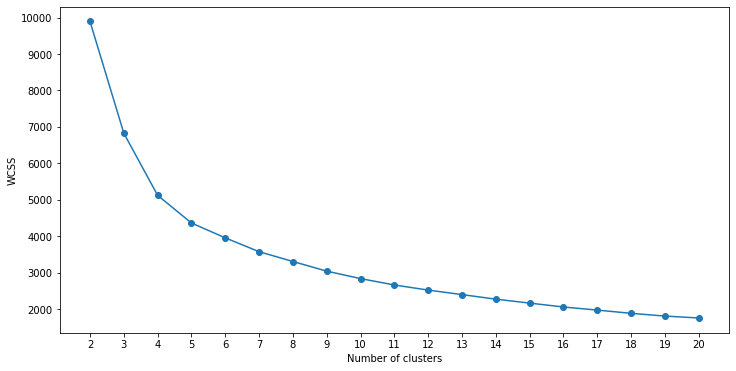

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_scores['K'], df_scores['WCSS'], marker='o')
plt.xticks(range(2,21))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'Silhouette score')

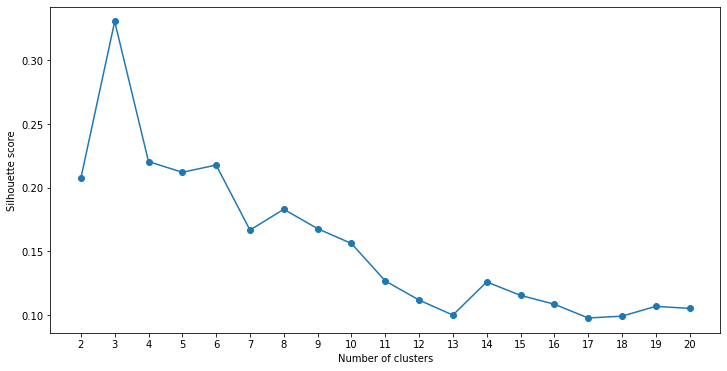

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_scores['K'], df_scores['silhouette_score'], marker='o')
plt.xticks(range(2,21))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

## Prediction

In [ ]:
kmeans = KMeans(n_clusters = df_scores[df_scores['silhouette_score']==df_scores['silhouette_score'].max()]['K'].values[0], 
                init='k-means++',
                random_state=42)
kmeans.fit(clust_df_std)
pred_kmeans = kmeans.predict(clust_df_std)
pred_kmeans

array([0, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
# Assign the predicted cluster labels to the `clust_df` and `df` dataframes
clust_df['Kmeans_pred'] = pred_kmeans
df['Kmeans_pred'] = pred_kmeans


In [ ]:
# Print the updated DataFrame with the new column
clust_df

,age,avg_glucose_level,bmi,Kmeans_pred
id,,,,
67,17.0,92.97,29.103667,0
77,13.0,85.81,18.600000,0
84,55.0,89.17,31.500000,1
91,42.0,98.53,18.500000,0
99,31.0,108.89,52.300000,1
...,...,...,...,...
72911,57.0,129.54,60.900000,1
72914,19.0,90.57,24.200000,0
72915,45.0,172.33,45.300000,2


In [ ]:
#Create an empty dataframe to store the evaluation metric results
metric_df = pd.DataFrame(columns=['Method',
                                  'Parameter',
                                  'Silhoutte Score'])
metric_df.loc[len(metric_df)] = ('Kmeans',
                                 {"K":df_scores[df_scores['silhouette_score']==df_scores['silhouette_score'].max()]['K'].values[0]},
                                 df_scores['silhouette_score'].max())
metric_df

,Method,Parameter,Silhoutte Score
0,Kmeans,{'K': 3},0.330486


## DBSCAN

## Identifying Optimum parameter values

In [ ]:
# Create empty lists to store the values for different parameters
eps = []
min_samp = []
silhouette_sc = []
n_clust = []

# Loop through different values of eps and min_samples
for e in [x/10 for x in range(1,10)]:
    for ms in range(2,31):
        print(e,ms)
        # Create a DBSCAN object with the current values of eps and min_samples
        db = DBSCAN(eps=e,min_samples=ms,n_jobs=-1)
        # Fit the DBSCAN object to the standardized feature matrix
        db.fit(clust_df_std)
        # Append the current values of eps and min_samples to their respective lists
        eps.append(e)
        min_samp.append(ms)
        # Append the number of clusters (unique labels) to the n_clust list
        n_clust.append(pd.Series(db.labels_).nunique())
        # If the number of clusters is less than 2, append a silhouette score of -1
        if pd.Series(db.labels_).nunique() < 2:
            silhouette_sc.append(-1)
        # Otherwise, compute the silhouette score and append it to the silhouette_sc list
        else:
            silhouette_sc.append(silhouette_score(clust_df[clust_cols],db.labels_))


0.1 2
0.1 3
0.1 4
0.1 5
0.1 6
0.1 7
0.1 8
0.1 9
0.1 10
0.1 11
0.1 12
0.1 13
0.1 14
0.1 15
0.1 16
0.1 17
0.1 18
0.1 19
0.1 20
0.1 21
0.1 22
0.1 23
0.1 24
0.1 25
0.1 26
0.1 27
0.1 28
0.1 29
0.1 30
0.2 2
0.2 3
0.2 4
0.2 5
0.2 6
0.2 7
0.2 8
0.2 9
0.2 10
0.2 11
0.2 12
0.2 13
0.2 14
0.2 15
0.2 16
0.2 17
0.2 18
0.2 19
0.2 20
0.2 21
0.2 22
0.2 23
0.2 24
0.2 25
0.2 26
0.2 27
0.2 28
0.2 29
0.2 30
0.3 2
0.3 3
0.3 4
0.3 5
0.3 6
0.3 7
0.3 8
0.3 9
0.3 10
0.3 11
0.3 12
0.3 13
0.3 14
0.3 15
0.3 16
0.3 17
0.3 18
0.3 19
0.3 20
0.3 21
0.3 22
0.3 23
0.3 24
0.3 25
0.3 26
0.3 27
0.3 28
0.3 29
0.3 30
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.4 20
0.4 21
0.4 22
0.4 23
0.4 24
0.4 25
0.4 26
0.4 27
0.4 28
0.4 29
0.4 30
0.5 2
0.5 3
0.5 4
0.5 5
0.5 6
0.5 7
0.5 8
0.5 9
0.5 10
0.5 11
0.5 12
0.5 13
0.5 14
0.5 15
0.5 16
0.5 17
0.5 18
0.5 19
0.5 20
0.5 21
0.5 22
0.5 23
0.5 24
0.5 25
0.5 26
0.5 27
0.5 28
0.5 29
0.5 30
0.6 2
0.6 3
0.6 4
0.6 5
0

In [ ]:
# Create a Pandas DataFrame from the results
df_scores = pd.DataFrame(list(zip(eps,min_samp,silhouette_sc,n_clust)),
                         columns=['eps','min_samples','score',"K"])

# Sort the DataFrame by silhouette score in descending order
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores

,eps,min_samples,score,K
138,0.5,24,0.440302,3
141,0.5,27,0.439677,3
139,0.5,25,0.439198,3
140,0.5,26,0.438189,3
142,0.5,28,0.438133,3
...,...,...,...,...
25,0.1,27,-1.000000,1
232,0.9,2,-1.000000,1
233,0.9,3,-1.000000,1
234,0.9,4,-1.000000,1


In [ ]:
# Sort the DataFrame by 'eps' in ascending order and 'min_samples' in ascending order
df_scores.sort_values(by=['eps', 'min_samples'], ascending=[True, True])


,eps,min_samples,score,K
0,0.1,2,-0.328452,688
1,0.1,3,-0.453753,310
2,0.1,4,-0.571160,163
3,0.1,5,-0.584372,86
4,0.1,6,-0.612367,41
...,...,...,...,...
256,0.9,26,0.356496,2
257,0.9,27,0.356496,2
258,0.9,28,0.356496,2
259,0.9,29,0.356496,2


In [ ]:
# Select the parameter values with the highest silhouette score
db = DBSCAN(
    eps=df_scores[df_scores['score'] == df_scores['score'].max()]['eps'].values[0], 
    min_samples=df_scores[df_scores['score'] == df_scores['score'].max()]['min_samples'].values[0],
    n_jobs=-1
)
# Fit the model on the standardized data
db.fit(clust_df_std)
# Get the predicted cluster labels
dbs_pred = db.labels_
dbs_pred

array([ 0,  0,  0, ..., -1,  0,  0])

In [ ]:
clust_df['DBS_Pred'] = dbs_pred
df['DBS_Pred'] = dbs_pred

In [ ]:
metric_df.loc[len(metric_df)] = ('DBSCAN',
                                 {"eps":df_scores[df_scores['score']==df_scores['score'].max()]['eps'].values[0],
                                  "min_samples":df_scores[df_scores['score']==df_scores['score'].max()]['min_samples'].values[0]},
                                 df_scores['score'].max())
metric_df

,Method,Parameter,Silhoutte Score
0,Kmeans,{'K': 3},0.330486
1,DBSCAN,"{'eps': 0.5, 'min_samples': 24}",0.440302


## Agglomarative Clustering

## Identifying Optimum parameter values

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clust = []
linkage = []
silhouette_sc = []
for i in range(2,11):
    for l in ['ward', 'complete', 'average', 'single']:
        print(i,l)
        agm = AgglomerativeClustering(n_clusters=i,linkage=l, 
                             compute_full_tree=True)
        agm.fit(clust_df_std)
        n_clust.append(i)
        linkage.append(l)
        if pd.Series(agm.labels_).nunique() <2:
            silhouette_sc.append(-1)
        else:
            silhouette_sc.append(silhouette_score(clust_df[clust_cols],agm.labels_))

2 ward
2 complete
2 average
2 single
3 ward
3 complete
3 average
3 single
4 ward
4 complete
4 average
4 single
5 ward
5 complete
5 average
5 single
6 ward
6 complete
6 average
6 single
7 ward
7 complete
7 average
7 single
8 ward
8 complete
8 average
8 single
9 ward
9 complete
9 average
9 single
10 ward
10 complete
10 average
10 single


In [ ]:
df_scores = pd.DataFrame(list(zip(n_clust,linkage,silhouette_sc)),
                         columns=['K','linkage','score'])
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores

,K,linkage,score
3,2,single,0.349245
4,3,ward,0.286823
0,2,ward,0.181344
8,4,ward,0.179837
20,7,ward,0.165578
24,8,ward,0.137476
16,6,ward,0.136737
28,9,ward,0.121779
32,10,ward,0.121246
6,3,average,0.115032


In [ ]:
agm = AgglomerativeClustering(n_clusters = df_scores[df_scores['score']==df_scores['score'].max()]['K'].values[0],
                              linkage = df_scores[df_scores['score']==df_scores['score'].max()]['linkage'].values[0],
                              compute_full_tree=True)
agm_pred = agm.fit_predict(clust_df_std)

In [ ]:
df['AGM_pred'] = agm_pred
clust_df['AGM_pred'] = agm_pred

In [ ]:
metric_df.loc[len(metric_df)] = ('Agglomarative',
                                 {"K":df_scores[df_scores['score']==df_scores['score'].max()]['K'].values[0],
                                  "linkage":df_scores[df_scores['score']==df_scores['score'].max()]['linkage'].values[0]},
                                 df_scores['score'].max())
metric_df

,Method,Parameter,Silhoutte Score
0,Kmeans,{'K': 3},0.330486
1,DBSCAN,"{'eps': 0.5, 'min_samples': 24}",0.440302
2,Agglomarative,"{'K': 2, 'linkage': 'single'}",0.349245


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Kmeans_pred,DBS_Pred,AGM_pred
id,,,,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,29.103667,formerly smoked,0,0,0,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0,0,0,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,0,1,0,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,0,0,0,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,0,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.900000,smokes,0,1,-1,0
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.200000,Unknown,0,0,0,0
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.300000,formerly smoked,0,2,-1,0


In [ ]:
df['DBS_Pred']+=1

In [ ]:
#df.to_csv("/content/gdrive/MyDrive/MP_3_26_11/df_with_clusters.csv")

In [ ]:
import joblib
#joblib.dump(db,"../Data/Mini Project 3/dbscan.joblib")